In [10]:
!pip install mtcnn facenet-pytorch opencv-python matplotlib tensorflow tensorflow-hub


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 18.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 755.5/755.5 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 83.2 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB

In [1]:
from facenet_pytorch import InceptionResnetV1
import torch
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from mtcnn import MTCNN
import cv2
from numpy.linalg import norm

In [2]:
# Load the FaceNet model
facenet_model = InceptionResnetV1(pretrained='vggface2').eval()

  0%|          | 0.00/107M [00:00<?, ?B/s]

In [3]:
# Function to get embedding from the FaceNet model
def get_embedding(model, image):
    with torch.no_grad():
        embedding = model(image)
    return embedding

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    try:
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"Failed to download image. Error: {e}")
        return None

# Function to preprocess the image
def preprocess_image(image, target_size=(160, 160)):
    img = image.convert('RGB')
    img = img.resize(target_size)
    img = np.array(img)
    img = img / 255.0
    img = np.transpose(img, (2, 0, 1))  # Change to (C, H, W) format
    img = np.expand_dims(img, axis=0)
    img = torch.tensor(img, dtype=torch.float32)
    return img

# TESTING FIRST WITH CHRIS HEMSWORTH
We've decided to try the model with Chris Hemsworth and his family to see how accurate Facenet and MTCNN can be with little to no training.

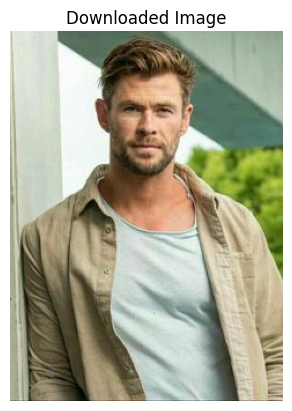

torch.Size([1, 3, 160, 160])
Reference Embedding:
tensor([[-8.9185e-03, -9.1635e-02,  7.5158e-03,  7.6803e-02, -4.1827e-02,
         -5.5463e-02, -3.5267e-02, -1.9871e-02,  2.1753e-02,  1.1487e-02,
          4.6138e-02,  8.8188e-03, -5.0259e-02,  2.8767e-02,  2.6009e-02,
         -3.2465e-02, -3.6929e-02,  4.8196e-02,  1.1666e-02,  4.5614e-02,
         -3.9668e-03,  8.9102e-02,  1.6429e-02, -8.6062e-02, -1.4107e-01,
          4.9277e-02, -5.7669e-03,  2.4253e-02, -1.4156e-02, -2.7157e-02,
         -4.7187e-02,  7.0792e-02,  4.2117e-02, -4.9556e-02, -6.1417e-02,
          1.0773e-02, -3.2674e-02,  7.7925e-02,  2.2403e-02, -3.5056e-02,
         -4.8515e-02,  2.2474e-04,  1.9698e-03, -2.6370e-02,  1.0968e-02,
         -5.1332e-02,  3.4524e-02,  2.5054e-03, -3.4814e-02,  1.1036e-02,
         -1.3209e-04,  5.5483e-02,  1.4353e-02,  1.7656e-02, -5.0924e-02,
         -3.9525e-03,  8.5316e-03,  1.0469e-01,  2.4676e-02, -1.1883e-03,
         -3.3368e-02, -1.6216e-02,  7.3443e-03, -1.4379e-02,  

In [ ]:
import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from mtcnn import MTCNN
import cv2
from numpy.linalg import norm

# Usage
image_url = "https://i.pinimg.com/236x/55/6a/e7/556ae726c3fa153be58acabe8cdc951e.jpg"  # Direct link to the image file
image = download_image(image_url)

if image:
    processed_image = preprocess_image(image)
    # Display the downloaded and preprocessed image
    plt.imshow(image)
    plt.title("Downloaded Image")
    plt.axis("off")
    plt.show()
    # Preprocessed image is ready for the FaceNet model
    print(processed_image.shape)  # Should be (1, 3, 160, 160)
else:
    print("Image could not be downloaded or identified.")

# Generate embedding for the processed image
if image:
    reference_embedding = get_embedding(facenet_model, processed_image)



In [ ]:
# Group image URL
group_image_url = "https://people.com/thmb/nOe0Ut9SNfsUrj2LFo873VSVgTY=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc():focal(739x298:741x300)/chris-hemsworth-elsa-pataky-family-mad-max-premiere-050224-1-b28a72c7c6a246cb8962627f6c7ddc79.jpg"
group_image = download_image(group_image_url)

if group_image:
    group_image_rgb = np.array(group_image.convert('RGB'))
    print(f"Group Image Shape: {group_image_rgb.shape}")
else:
    print("Group image could not be downloaded or identified.")


Group Image Shape: (1000, 1500, 3)


In [ ]:
# Convert group image to OpenCV format
group_image_bgr = cv2.cvtColor(group_image_rgb, cv2.COLOR_RGB2BGR)

3/3 [==============================] - 0s 37ms/step


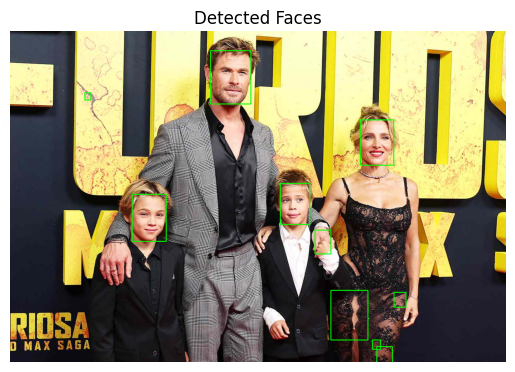

In [ ]:
# Detect faces
detector = MTCNN()
results = detector.detect_faces(group_image_rgb)

# Display detected faces
for result in results:
    x, y, width, height = result['box']
    cv2.rectangle(group_image_bgr, (x, y), (x+width, y+height), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(group_image_bgr, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces")
plt.axis("off")
plt.show()

In [ ]:
# Function to preprocess face image
def preprocess_face(face, target_size=(160, 160)):
    face = cv2.resize(face, target_size)
    face = face.astype('float32') / 255.0
    face = np.transpose(face, (2, 0, 1))  # Change to (C, H, W) format
    face = np.expand_dims(face, axis=0)
    face = torch.tensor(face, dtype=torch.float32)
    return face

# Extract and preprocess faces
faces = []
for result in results:
    x, y, width, height = result['box']
    face = group_image_rgb[y:y+height, x:x+width]
    face_preprocessed = preprocess_face(face)
    faces.append(face_preprocessed)

# Generate embeddings for all detected faces
embeddings = []
for face in faces:
    embedding = get_embedding(facenet_model, face)
    embeddings.append(embedding)

# Function to compare embeddings using cosine similarity
def cosine_similarity(emb1, emb2):
    emb1 = emb1.numpy()
    emb2 = emb2.numpy()
    dot_product = np.dot(emb1, emb2.T)
    norm_a = norm(emb1)
    norm_b = norm(emb2)
    return dot_product / (norm_a * norm_b)


In [ ]:
# Compare embeddings and identify Chris Hemsworth
threshold = 0.4  # Adjust based on accuracy needs (lowered for more sensitivity)
identified_faces = []
for i, embedding in enumerate(embeddings):
    similarity = cosine_similarity(reference_embedding, embedding)
    print(f"Face {i} similarity: {similarity}")  # Debugging line to check similarity
    if similarity > threshold:
        print(f"Face {i} identified as Chris Hemsworth with similarity {similarity}")
        identified_faces.append((results[i]['box'], "Chris Hemsworth"))



Face 0 similarity: [[0.02883995]]
Face 1 similarity: [[0.06777316]]
Face 2 similarity: [[0.08736988]]
Face 3 similarity: [[0.06461902]]
Face 4 similarity: [[0.24703959]]
Face 5 similarity: [[0.16759832]]
Face 6 similarity: [[0.17443618]]
Face 7 similarity: [[0.00524301]]
Face 8 similarity: [[-0.22472556]]
Face 9 similarity: [[0.4512173]]
Face 9 identified as Chris Hemsworth with similarity [[0.4512173]]


In [ ]:
# Display identified faces with labels and red squares for Chris Hemsworth
for (box, label) in identified_faces:
    x, y, width, height = box
    print(f"Drawing red rectangle for {label} at coordinates: {box}")  # Debugging line
    cv2.rectangle(group_image_bgr, (x, y), (x+width, y+height), (255, 0, 0), 2)
    cv2.putText(group_image_bgr, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

Drawing red rectangle for Chris Hemsworth at coordinates: [226, 186, 18, 22]


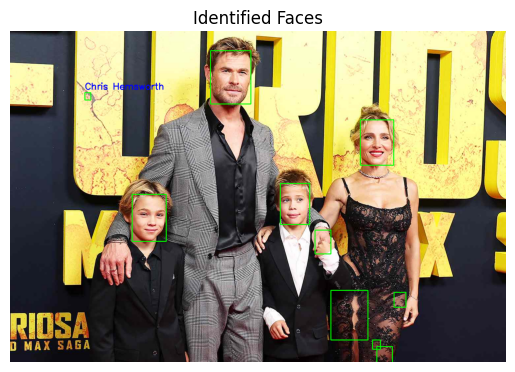

In [ ]:
# Redraw other faces to keep their green rectangles
for result in results:
    x, y, width, height = result['box']
    if (x, y, width, height) not in [face[0] for face in identified_faces]:
        cv2.rectangle(group_image_bgr, (x, y), (x+width, y+height), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(group_image_bgr, cv2.COLOR_BGR2RGB))
plt.title("Identified Faces")
plt.axis("off")
plt.show()

# RYAN GOSLING
Now, we'll try to reproduce the same erroneous output with Ryan Gosling, since we've decided to change the subject of our project.

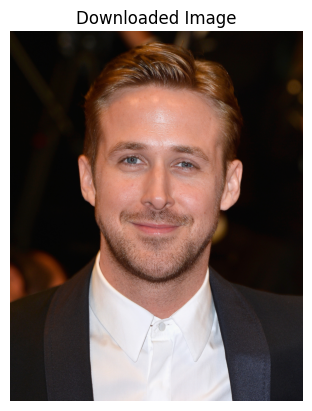

torch.Size([1, 3, 160, 160])


In [4]:
#TRYING FAILED CODE ON RYAN GOSLING

import requests
from io import BytesIO
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
from mtcnn import MTCNN
import cv2
from numpy.linalg import norm

# Example usage
image_url = "https://m.media-amazon.com/images/M/MV5BMTQzMjkwNTQ2OF5BMl5BanBnXkFtZTgwNTQ4MTQ4MTE@._V1_.jpg"  # Direct link to the image file
image = download_image(image_url)

if image:
    processed_image = preprocess_image(image)
    # Display the downloaded and preprocessed image
    plt.imshow(image)
    plt.title("Downloaded Image")
    plt.axis("off")
    plt.show()
    # Preprocessed image is ready for the FaceNet model
    print(processed_image.shape)  # Should be (1, 3, 160, 160)
else:
    print("Image could not be downloaded or identified.")

# Generate embedding for the processed image
if image:
    reference_embedding = get_embedding(facenet_model, processed_image)



In [5]:
# Group image URL RYAN GOSLING FACENET
group_image_url = "https://c8.alamy.com/comp/HGGBKP/los-angeles-usa-08th-jan-2017-lala-land-cast-ryan-gosling-emma-stone-HGGBKP.jpg"
group_image = download_image(group_image_url)

if group_image:
    group_image_rgb = np.array(group_image.convert('RGB'))
    print(f"Group Image Shape: {group_image_rgb.shape}")
else:
    print("Group image could not be downloaded or identified.")

Group Image Shape: (937, 1300, 3)


In [6]:
# Convert group image to OpenCV format
group_image_bgr = cv2.cvtColor(group_image_rgb, cv2.COLOR_RGB2BGR)

3/3 [==============================] - 0s 26ms/step


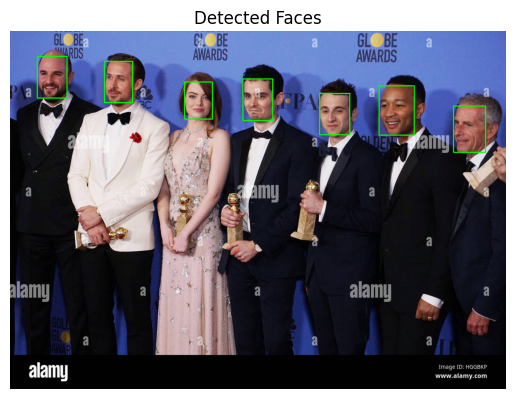

In [7]:
# Detect faces
detector = MTCNN()
results = detector.detect_faces(group_image_rgb)

# Display detected faces
for result in results:
    x, y, width, height = result['box']
    cv2.rectangle(group_image_bgr, (x, y), (x+width, y+height), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(group_image_bgr, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces")
plt.axis("off")
plt.show()

In [8]:
# Function to preprocess face image
def preprocess_face(face, target_size=(160, 160)):
    face = cv2.resize(face, target_size)
    face = face.astype('float32') / 255.0
    face = np.transpose(face, (2, 0, 1))  # Change to (C, H, W) format
    face = np.expand_dims(face, axis=0)
    face = torch.tensor(face, dtype=torch.float32)
    return face

# Extract and preprocess faces
faces = []
for result in results:
    x, y, width, height = result['box']
    face = group_image_rgb[y:y+height, x:x+width]
    face_preprocessed = preprocess_face(face)
    faces.append(face_preprocessed)

# Generate embeddings for all detected faces
embeddings = []
for face in faces:
    embedding = get_embedding(facenet_model, face)
    embeddings.append(embedding)

# Function to compare embeddings using cosine similarity
def cosine_similarity(emb1, emb2):
    emb1 = emb1.numpy()
    emb2 = emb2.numpy()
    dot_product = np.dot(emb1, emb2.T)
    norm_a = norm(emb1)
    norm_b = norm(emb2)
    return dot_product / (norm_a * norm_b)


In [9]:
# Compare embeddings and identify Ryan Gosling
threshold = 0.4  # Adjust based on accuracy needs (lowered for more sensitivity)
identified_faces = []
for i, embedding in enumerate(embeddings):
    similarity = cosine_similarity(reference_embedding, embedding)
    print(f"Face {i} similarity: {similarity}")  # Debugging line to check similarity
    if similarity > threshold:
        print(f"Face {i} identified as Ryan Gosling with similarity {similarity}")
        identified_faces.append((results[i]['box'], "Ryan Gosling"))



Face 0 similarity: [[-0.0313575]]
Face 1 similarity: [[0.17933373]]
Face 2 similarity: [[0.5150299]]
Face 2 identified as Ryan Gosling with similarity [[0.5150299]]
Face 3 similarity: [[0.16990474]]
Face 4 similarity: [[0.08581498]]
Face 5 similarity: [[0.29735824]]
Face 6 similarity: [[-0.0569728]]


In [10]:
# Display identified faces with labels and red squares for Ryan Gosling
for (box, label) in identified_faces:
    x, y, width, height = box
    print(f"Drawing red rectangle for {label} at coordinates: {box}")  # Debugging line
    cv2.rectangle(group_image_bgr, (x, y), (x+width, y+height), (255, 0, 0), 2)
    cv2.putText(group_image_bgr, label, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

Drawing red rectangle for Ryan Gosling at coordinates: [247, 79, 74, 108]


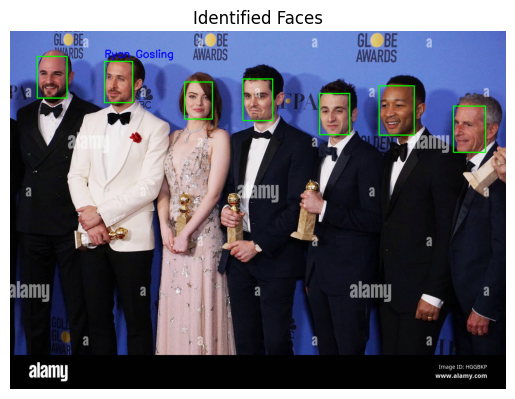

In [11]:
# Redraw other faces to keep their green rectangles
for result in results:
    x, y, width, height = result['box']
    if (x, y, width, height) not in [face[0] for face in identified_faces]:
        cv2.rectangle(group_image_bgr, (x, y), (x+width, y+height), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(group_image_bgr, cv2.COLOR_BGR2RGB))
plt.title("Identified Faces")
plt.axis("off")
plt.show()

# `INSIGHTFACE`
In this stage, we decided to try something other than FaceNet and MTCNN. We got the desired results, but we want to use a higher threshold, we want our model to be more sure of what it's saying, so we decided to use insightface's open source library.

In [12]:
!pip install insightface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 9.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 46.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 39.6 MB/s eta 0:00:00
  Created wheel for insightface: filename=insightface-0.7.3-cp310-cp310-linux_x86_64.whl size=1055331 sha256=1612bc8844e4c9f5e135c842180d471cee6f230ef02d64b7a43d4c406c8cc54c
  Stored in directory: /root/.cache/pip/wheels/e3/d0/80/e3773fb8b6d1cca87ea1d33d9b1f20a223a6493c896da249b5
Successfully built insightface
  Attempting uninstall: Pillow
    Found existing installation: pillow 10.2.0
    Uninstalling pillow-10.2.0:
      Successfully uninstalled pillow-10.2.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dep

In [3]:
!pip install onnxruntime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 13.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 8.2 MB/s eta 0:00:00


download_path: /root/.insightface/models/buffalo_l


100%|██████████| 281857/281857 [00:05<00:00, 51891.02KB/s]
/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


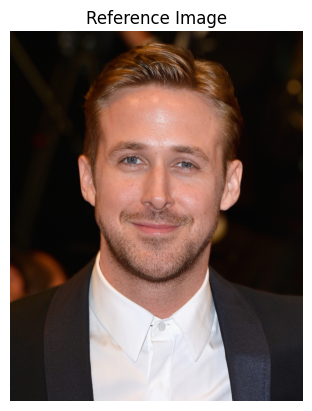

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


Reference Embedding:
[-0.31891257  0.8337811  -0.11436555 -1.1111736  -1.3189163   0.5379531
  1.3412671  -1.0352153  -0.42804468  0.5370877   1.670596   -0.07837946
  0.79966927 -0.54310554  0.83102894 -0.5017234  -0.458904    0.5173468
 -0.50584716  0.8946119   0.8943376   0.47867957 -1.2682662   0.60471904
  0.09653255 -0.30154538 -0.14975122 -1.7336276   0.05248265 -0.43349943
 -0.29753047 -0.19663438  0.2334676   0.69082654  0.52660197 -1.3695959
 -0.18362892  0.45335737 -2.0120466  -0.40820557 -1.7541684  -0.05543274
 -0.54888177 -0.7177463  -0.37498352 -0.73062235 -0.17828757 -0.33234555
  1.8778034   1.0806361   0.35638744  0.78714794 -0.8806279   0.63829184
  0.7544494   0.83317477  0.22783384 -0.14259894  1.0170772   0.7975477
  0.55417496 -0.6752436   0.62742394  0.6744485  -0.10608344  0.8074602
  0.55853283 -0.13137673  1.1550447   1.6863909   0.80528283 -0.4125064
 -0.45136422  0.6643559  -0.16318591  0.16945998 -0.2162486   0.0085583
  1.132379   -1.0273983   1.1626539  

In [ ]:
import insightface
from insightface.app import FaceAnalysis
from insightface.data import get_image as ins_get_image
import cv2
import matplotlib.pyplot as plt
import numpy as np
import requests
from io import BytesIO
from PIL import Image

# Load ArcFace
app = FaceAnalysis(name='buffalo_l', providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

# function to download the image from a specific URL
def download_image(url):
    response = requests.get(url)
    try:
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"Failed to download image. Error: {e}")
        return None

# Function to convert image to OpenCV format
def pil_to_cv2(image):
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Usage
image_url = "https://m.media-amazon.com/images/M/MV5BMTQzMjkwNTQ2OF5BMl5BanBnXkFtZTgwNTQ4MTQ4MTE@._V1_.jpg"
image = download_image(image_url)
if image:
    ref_image_cv2 = pil_to_cv2(image)
    plt.imshow(image)
    plt.title("Reference Image")
    plt.axis("off")
    plt.show()
else:
    print("Image could not be downloaded or identified.")

# Get the embedding for the reference image
faces = app.get(ref_image_cv2)
if len(faces) > 0:
    reference_embedding = faces[0].embedding
    print("Reference Embedding:")
    print(reference_embedding)
else:
    print("No face detected in the reference image.")


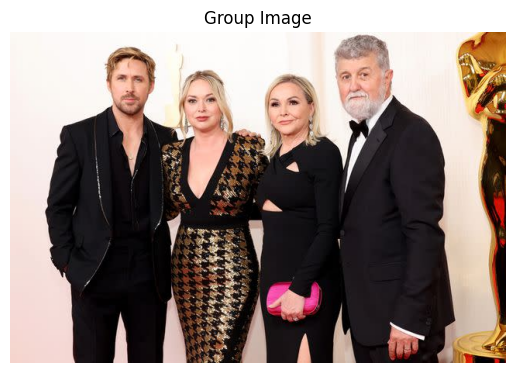

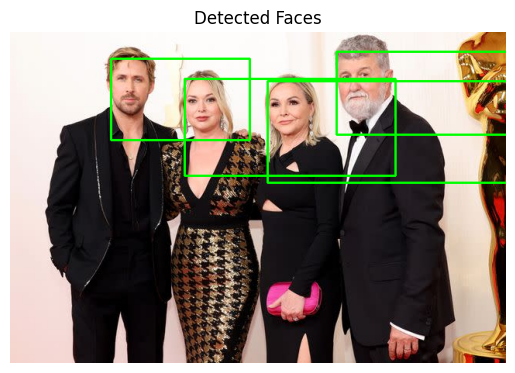

Face similarity: 0.613632321357727
Face similarity: 0.029901999980211258
Face similarity: 0.09273933619260788
Face similarity: 0.07358305901288986
Drawing red rectangle for Ryan Gosling at coordinates: [130.0595   34.87834 179.92274 105.92241]


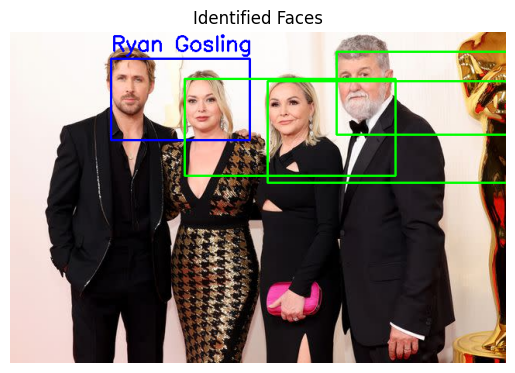

In [ ]:
# Group image URL
group_image_url = "https://s.yimg.com/ny/api/res/1.2/3976xxHxzNxu7TbiSq18iw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTQyNw--/https://media.zenfs.com/en/people_218/d6d3bc8fb78fd062a4ea578095c124f4"
group_image = download_image(group_image_url)

if group_image:
    group_image_cv2 = pil_to_cv2(group_image)
    plt.imshow(group_image)
    plt.title("Group Image")
    plt.axis("off")
    plt.show()
else:
    print("Group image could not be downloaded or identified.")

# Detect faces in the group image
faces = app.get(group_image_cv2)

# Display detected faces
for face in faces:
    x, y, w, h = face.bbox.astype(int)
    cv2.rectangle(group_image_cv2, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(group_image_cv2, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces")
plt.axis("off")
plt.show()

# Function to compare embeddings using cosine similarity
def cosine_similarity(emb1, emb2):
    dot_product = np.dot(emb1, emb2.T)
    norm_a = np.linalg.norm(emb1)
    norm_b = np.linalg.norm(emb2)
    return dot_product / (norm_a * norm_b)

# Compare embeddings and identify Ryan Gosling
threshold = 0.5  # Adjust based on accuracy needs
identified_faces = []
for face in faces:
    similarity = cosine_similarity(reference_embedding, face.embedding)
    print(f"Face similarity: {similarity}")  # Debugging line to check similarity
    if similarity > threshold:
        identified_faces.append((face.bbox, "Ryan Gosling"))

# Display identified faces with labels and red squares for Chris Hemsworth
for (bbox, label) in identified_faces:
    x, y, w, h = bbox.astype(int)
    print(f"Drawing red rectangle for {label} at coordinates: {bbox}")  # Debugging line
    cv2.rectangle(group_image_cv2, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(group_image_cv2, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Redraw other faces to keep their green rectangles
for face in faces:
    x, y, w, h = face.bbox.astype(int)
    if not any(np.array_equal(face.bbox, bbox) for bbox, _ in identified_faces):
        cv2.rectangle(group_image_cv2, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(group_image_cv2, cv2.COLOR_BGR2RGB))
plt.title("Identified Faces")
plt.axis("off")
plt.show()


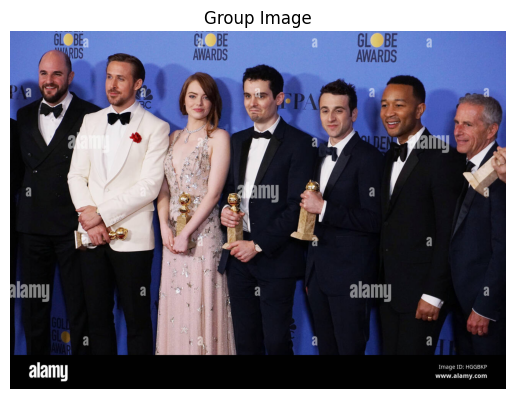

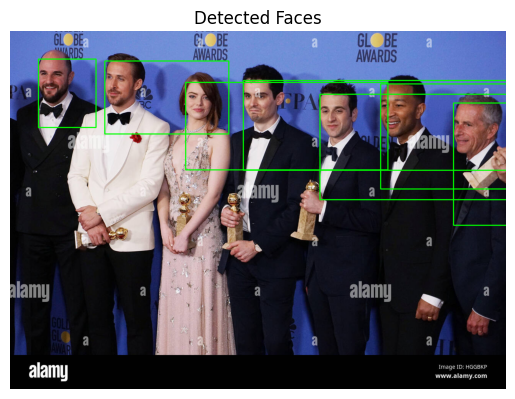

Face similarity: -0.07507909834384918
Face similarity: 0.043399564921855927
Face similarity: 0.006577969994395971
Face similarity: 0.07690513134002686
Face similarity: 0.02125808224081993
Face similarity: -0.09842929244041443
Face similarity: 0.7040398716926575
Drawing red rectangle for Ryan Gosling at coordinates: [248.67917  78.67057 325.92584 191.54277]


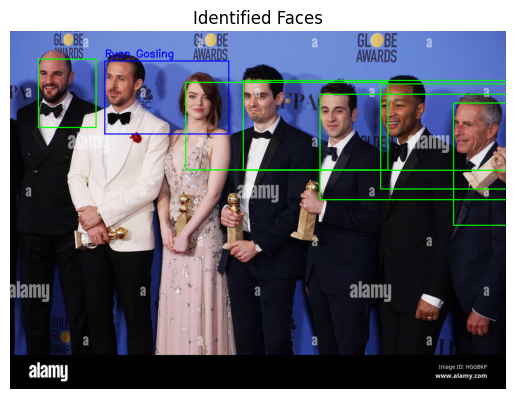

In [ ]:
# Group image URL
group_image_url = "https://c8.alamy.com/comp/HGGBKP/los-angeles-usa-08th-jan-2017-lala-land-cast-ryan-gosling-emma-stone-HGGBKP.jpg"
group_image = download_image(group_image_url)

if group_image:
    group_image_cv2 = pil_to_cv2(group_image)
    plt.imshow(group_image)
    plt.title("Group Image")
    plt.axis("off")
    plt.show()
else:
    print("Group image could not be downloaded or identified.")

# Detect faces in the group image
faces = app.get(group_image_cv2)

# Display detected faces
for face in faces:
    x, y, w, h = face.bbox.astype(int)
    cv2.rectangle(group_image_cv2, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(group_image_cv2, cv2.COLOR_BGR2RGB))
plt.title("Detected Faces")
plt.axis("off")
plt.show()

# Function to compare embeddings using cosine similarity
def cosine_similarity(emb1, emb2):
    dot_product = np.dot(emb1, emb2.T)
    norm_a = np.linalg.norm(emb1)
    norm_b = np.linalg.norm(emb2)
    return dot_product / (norm_a * norm_b)

# Compare embeddings and identify Chris Hemsworth
threshold = 0.5  # we'll adjust depending on how accurate our model ends up being
identified_faces = []
for face in faces:
    similarity = cosine_similarity(reference_embedding, face.embedding)
    print(f"Face similarity: {similarity}")  # Debugging line to check similarities
    if similarity > threshold:
        identified_faces.append((face.bbox, "Ryan Gosling"))

# Display identified faces with labels and red squares for Ryan Gosling
for (bbox, label) in identified_faces:
    x, y, w, h = bbox.astype(int)
    print(f"Drawing red rectangle for {label} at coordinates: {bbox}")  # Debugging line
    cv2.rectangle(group_image_cv2, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(group_image_cv2, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Redraw other faces to keep their green rectangles
for face in faces:
    x, y, w, h = face.bbox.astype(int)
    if not any(np.array_equal(face.bbox, bbox) for bbox, _ in identified_faces):
        cv2.rectangle(group_image_cv2, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(group_image_cv2, cv2.COLOR_BGR2RGB))
plt.title("Identified Faces")
plt.axis("off")
plt.show()

In [ ]:
#let's connect to the google drive and use the images of ryan gosling and NOT ryan gosling
from google.colab import drive
drive.mount('/content/drive')

import os

# Directories for the dataset
ryan_dir = '/content/drive/MyDrive/ryan_images'
not_ryan_dir = '/content/drive/MyDrive/not_ryan_images'

# Check if directories exist
assert os.path.exists(ryan_dir), f"{ryan_dir} does not exist."
assert os.path.exists(not_ryan_dir), f"{not_ryan_dir} does not exist."


Mounted at /content/drive


In [ ]:
!pip install google_images_download


  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.4/9.4 MB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 467.7/467.7 kB 32.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.3 MB/s eta 0:00:00
  Created wheel for google_images_download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14534 sha256=5b28f2f9977e0188ec0647958aa78d4739feae49a311c3890283ef765e5dce0c
  Stored in directory: /root/.cache/pip/wheels/5b/f2/64/0eecb22fee5cbc0321d332492ddcc45b03c6373b5616ee95c8
Successfully built google_images_download


In [ ]:
#Trying to webscrape the web for Ryan Gosling images
from google_images_download import google_images_download

response = google_images_download.googleimagesdownload()

arguments = {
    "keywords": "Ryan Gosling portrait",
    "limit": 100,  # Number of images to download
    "print_urls": True,
    "output_directory": "/content/drive/MyDrive/ryan_images",  # Path to folder on the google drive
    "format": "jpg",
    "size": "medium"
}

paths = response.download(arguments)
print(paths)



Item no.: 1 --> Item name = Ryan Gosling portrait
Evaluating...
Starting Download...


Unfortunately all 100 could not be downloaded because some images were not downloadable. 0 is all we got for this search filter!

Errors: 0

({'Ryan Gosling portrait': []}, 0)


# MANUALLY DOWNLOADED AND SELECTED DATA
Since trying to web-scrape google didn't work, we decided to manually search for ryan gosling images and provide them to the model.

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import os
import cv2
import numpy as np
from insightface.app import FaceAnalysis
import matplotlib.pyplot as plt

# Initialize face analysis
app = FaceAnalysis(name='buffalo_l', providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(640, 640))

# Directory containing images of Ryan Gosling
ryan_gosling_dir = '/content/drive/MyDrive/ryan_images'

def load_images_from_directory(directory):
    images = []
    for filename in os.listdir(directory):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            img_path = os.path.join(directory, filename)
            img = cv2.imread(img_path)
            if img is not None:
                images.append((img, filename))
    return images

# Load images of Ryan Gosling
ryan_images = load_images_from_directory(ryan_gosling_dir)

# Generate embeddings
ryan_embeddings = []
for img, filename in ryan_images:
    faces = app.get(img)
    if len(faces) == 1:
        embedding = faces[0].embedding
        ryan_embeddings.append(embedding)

ryan_embeddings = np.array(ryan_embeddings)


/usr/local/lib/python3.10/dist-packages/onnxruntime/capi/onnxruntime_inference_collection.py:69: UserWarning: Specified provider 'CUDAExecutionProvider' is not in available provider names.Available providers: 'AzureExecutionProvider, CPUExecutionProvider'
  warnings.warn(


Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/2d106det.onnx landmark_2d_106 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/det_10g.onnx detection [1, 3, '?', '?'] 127.5 128.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/genderage.onnx genderage ['None', 3, 96, 96] 0.0 1.0
Applied providers: ['CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}}
find model: /root/.insightface/models/buffalo_l/w600k_r50.onnx recognition ['None', 3, 112, 112] 127.5 127.5
set det-size: (640, 640)


/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


# TRY AGAIN BY SLIGHTLY TRAINING THE MODEL
Here we use no more than 11 images to feed the model and see if it's enough to improve our current performance.

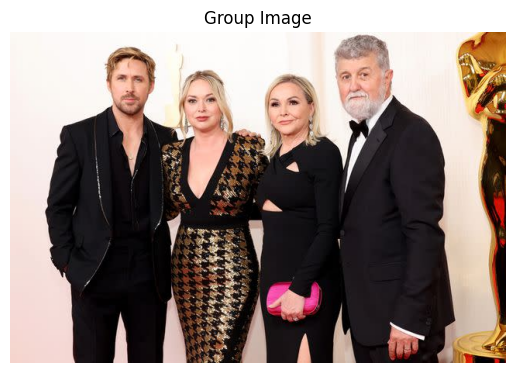

/usr/local/lib/python3.10/dist-packages/insightface/utils/transform.py:68: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  P = np.linalg.lstsq(X_homo, Y)[0].T # Affine matrix. 3 x 4


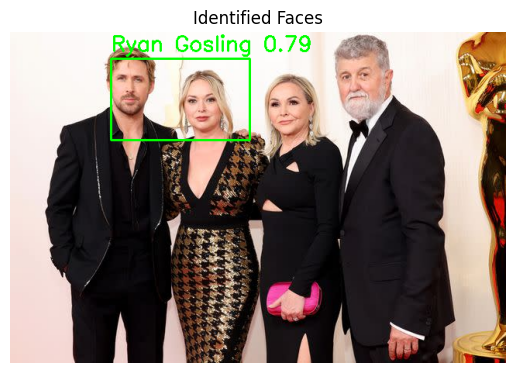

In [8]:
from sklearn.metrics.pairwise import cosine_similarity
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity

# URL of the group image
group_image_url = "https://s.yimg.com/ny/api/res/1.2/3976xxHxzNxu7TbiSq18iw--/YXBwaWQ9aGlnaGxhbmRlcjt3PTY0MDtoPTQyNw--/https://media.zenfs.com/en/people_218/d6d3bc8fb78fd062a4ea578095c124f4"

# Function to download an image from a URL
def download_image(url):
    response = requests.get(url)
    try:
        img = Image.open(BytesIO(response.content))
        return img
    except Exception as e:
        print(f"Failed to download image. Error: {e}")
        return None

# Convert PIL image to OpenCV format
def pil_to_cv2(image):
    return cv2.cvtColor(np.array(image), cv2.COLOR_RGB2BGR)

# Download and process group image
group_image = download_image(group_image_url)
if group_image:
    group_image_cv2 = pil_to_cv2(group_image)
    plt.imshow(group_image)
    plt.title("Group Image")
    plt.axis("off")
    plt.show()
else:
    print("Group image could not be downloaded or identified.")

# Detect faces in the group image
faces = app.get(group_image_cv2)

# Generate embeddings for detected faces
group_embeddings = []
group_labels = []
for face in faces:
    embedding = face.embedding
    group_embeddings.append(embedding)

group_embeddings = np.array(group_embeddings)

# Compare embeddings using cosine similarity
threshold = 0.5  # Set a threshold for cosine similarity
identified_faces = []

for i, group_embedding in enumerate(group_embeddings):
    similarities = cosine_similarity([group_embedding], ryan_embeddings)
    max_similarity = np.max(similarities)
    if max_similarity > threshold:
        identified_faces.append((faces[i].bbox, max_similarity))

# Display results
for (bbox, similarity) in identified_faces:
    x, y, w, h = bbox.astype(int)
    cv2.rectangle(group_image_cv2, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(group_image_cv2, f"Ryan Gosling {similarity:.2f}", (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(group_image_cv2, cv2.COLOR_BGR2RGB))
plt.title("Identified Faces")
plt.axis("off")
plt.show()


EUREKA!!

We can see that the model improved from 0.6 to 0.79! a great improvement with the image the model was less accurate with. We have achieved improving our model.